In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crimes=pd.read_csv("E:/python/Dataset/Chicago_Crimes_2012_to_2017.csv")
crimes.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [3]:
crimes.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [4]:
crimes.drop(['Unnamed: 0', 'Case Number','Block','IUCR', 'X Coordinate', 'Y Coordinate','Updated On', 'FBI Code', 'Beat','Ward','Community Area', 'Location','Latitude','Longitude','District'], inplace=True, axis=1)
crimes.head(4)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year
0,10508693,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016
1,10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016
2,10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016
3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,2016


In [5]:
crimes=crimes[(crimes['Year']==2016)|(crimes['Year']==2015)]
crimes.describe()

,ID,Year
count,5.284570e+05,528457.000000
mean,1.034563e+07,2015.502334
std,5.663949e+05,0.499995
min,2.171400e+04,2015.000000
25%,1.014746e+07,2015.000000
50%,1.037163e+07,2016.000000
75%,1.059204e+07,2016.000000
max,1.082787e+07,2016.000000


# Crimes each year

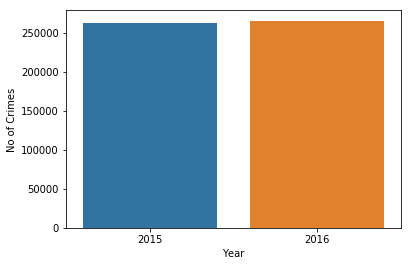

In [6]:
sns.countplot(x='Year',data=crimes)
plt.ylabel('No of Crimes')
plt.show()

In [7]:
crimes['Date'] = pd.to_datetime(crimes['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [8]:
import calendar
crimes['Month']=(crimes['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
crimes.head(4)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016,May
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016,May
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016,May
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,2016,May


In [9]:
crimes['Month'] = pd.Categorical(crimes['Month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

# Crimes per month

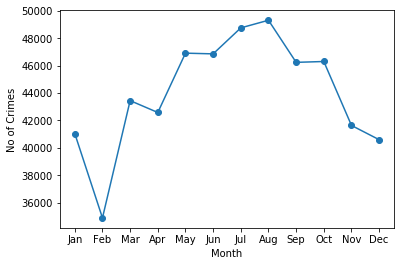

In [10]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimes.groupby('Month')['ID'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

# Comparison  of crimes per month in each year

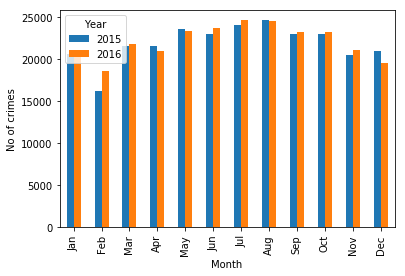

In [11]:
crimes.groupby(['Month','Year'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of crimes')
plt.show()

In [12]:
crimes["Weekday"] = crimes['Date'].dt.weekday_name
crimes['Weekday'] = pd.Categorical(crimes['Weekday'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month,Weekday
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016,May,Tuesday
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016,May,Tuesday
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016,May,Tuesday
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,2016,May,Tuesday
4,10508699,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,2016,May,Tuesday


# No of crimes recorded on days of the week

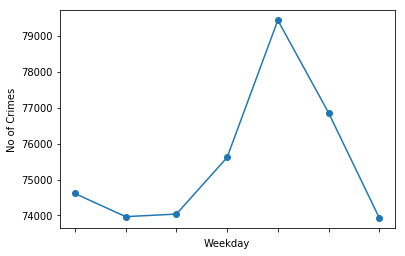

In [13]:
crimes.groupby('Weekday')['ID'].count().plot(marker='o',label='Crimes')
plt.ylabel('No of Crimes')
plt.show()

# Types of Crime in chicago

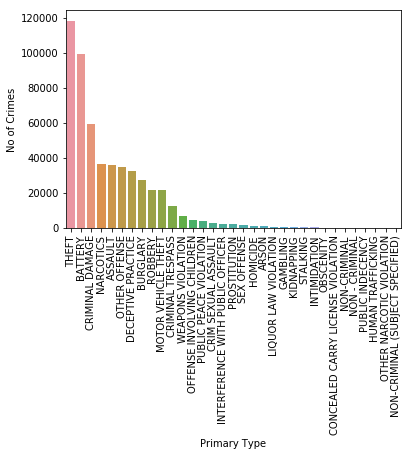

In [14]:
sns.countplot(x='Primary Type',data=crimes,order=crimes['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

# Top 10 Location where crime occurs

In [15]:
temp=crimes.groupby('Location Description')['ID'].count().sort_values(ascending=False)
temp=temp[:10]
temp

Location Description
STREET                            121632
RESIDENCE                          85754
APARTMENT                          68607
SIDEWALK                           51134
OTHER                              21552
PARKING LOT/GARAGE(NON.RESID.)     15538
SMALL RETAIL STORE                 11322
RESIDENTIAL YARD (FRONT/BACK)      11059
ALLEY                              10877
RESTAURANT                         10635
Name: ID, dtype: int64

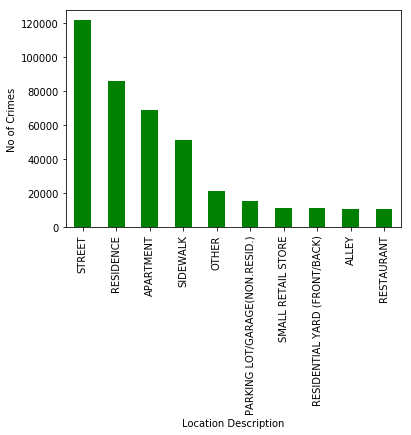

In [16]:
temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

# Was the criminal arrested?

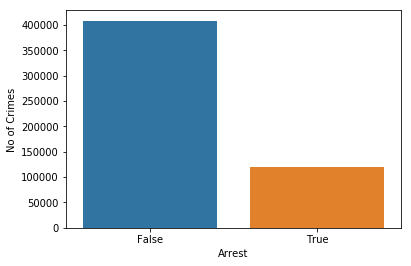

In [17]:
sns.countplot(x='Arrest',data=crimes)
plt.ylabel('No of Crimes')
plt.show()

# Year-wise Arrests

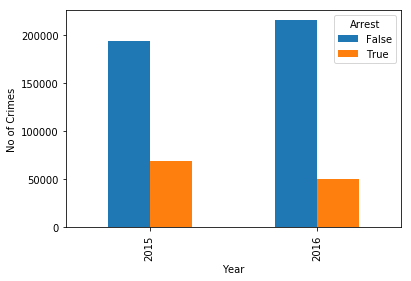

In [18]:
crimes.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()

# Crime-Wise arrests

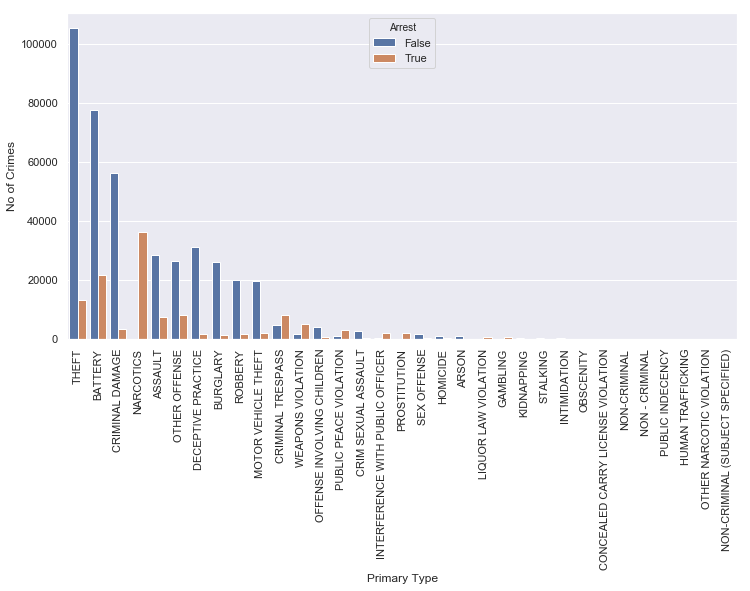

In [19]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=crimes,order=crimes['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [20]:
arrest=crimes[crimes['Arrest']==True]
arrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119783 entries, 0 to 1456713
Data columns (total 10 columns):
ID                      119783 non-null int64
Date                    119783 non-null datetime64[ns]
Primary Type            119783 non-null object
Description             119783 non-null object
Location Description    119781 non-null object
Arrest                  119783 non-null bool
Domestic                119783 non-null bool
Year                    119783 non-null int64
Month                   119783 non-null category
Weekday                 119783 non-null category
dtypes: bool(2), category(2), datetime64[ns](1), int64(2), object(3)
memory usage: 6.9+ MB


# Crime vs Arrest

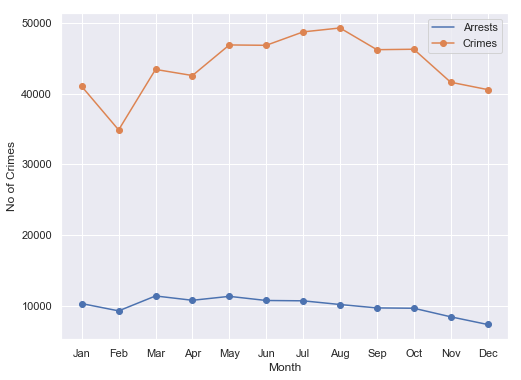

In [21]:
arrest.groupby('Month')['ID'].count().plot(legend=True,label='Arrests',marker='o',figsize=(8,6))
crimes.groupby('Month')['ID'].count().plot(legend=True,label='Crimes',marker='o')
plt.ylabel('No of Crimes')
plt.xticks(np.arange(12),months)
plt.show()

In [22]:
arrest.groupby('Month')['ID'].count()

Month
Jan    10303
Feb     9273
Mar    11383
Apr    10770
May    11327
Jun    10742
Jul    10695
Aug    10173
Sep     9690
Oct     9645
Nov     8434
Dec     7348
Name: ID, dtype: int64

In [23]:
crimes.groupby('Month')['ID'].count()

Month
Jan    41031
Feb    34877
Mar    43438
Apr    42572
May    46902
Jun    46850
Jul    48747
Aug    49304
Sep    46231
Oct    46293
Nov    41626
Dec    40586
Name: ID, dtype: int64

# Analysing top 5 crimes

In [24]:
top_crime=crimes[(crimes['Primary Type']=='THEFT')|(crimes['Primary Type']=='BATTERY')|(crimes['Primary Type']=='CRIMINAL DAMAGE')|(crimes['Primary Type']=='NARCOTICS')|(crimes['Primary Type']=='ASSAULT')]

In [25]:
temp=top_crime.pivot_table(values='ID', index='Month', columns='Year', aggfunc=np.size)

In [26]:
temp

Year,2015,2016
Month,,
Jan,13404,12934
Feb,10686,12110
Mar,14529,14567
Apr,14582,13939
May,16073,15638
Jun,15475,15849
Jul,16300,16408
Aug,16611,16086
Sep,15524,15263


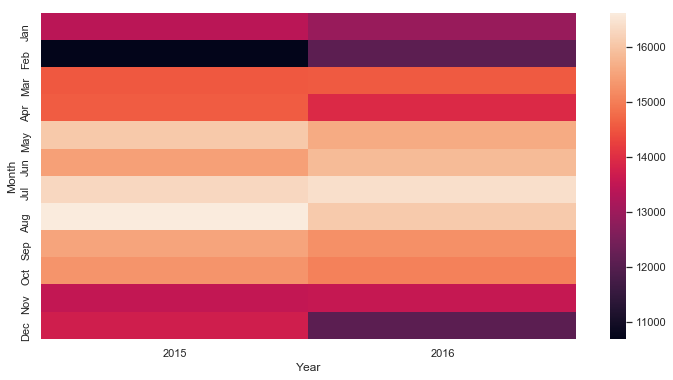

In [27]:
sns.heatmap(temp)
plt.show()

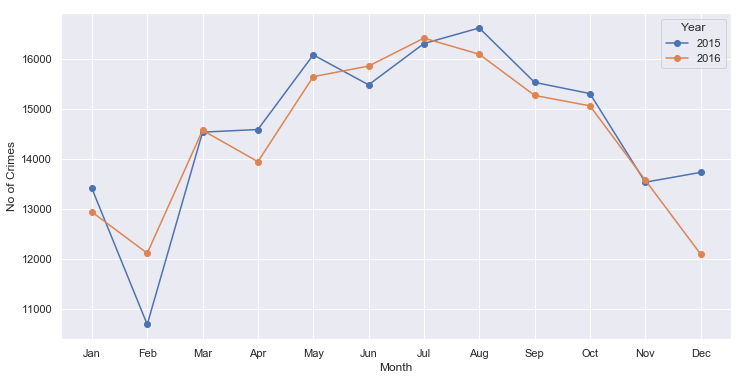

In [28]:
top_crime.groupby(['Month','Year'])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

# Hour of crime

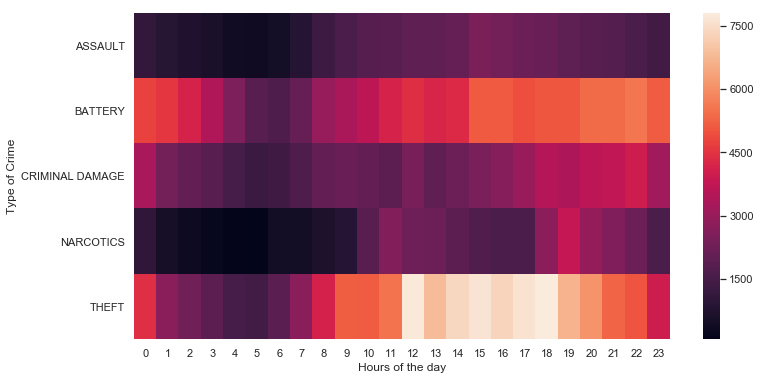

In [29]:
temp= top_crime.pivot_table(values='ID', index='Primary Type',columns=top_crime['Date'].dt.hour, aggfunc=np.size)
sns.heatmap(temp)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

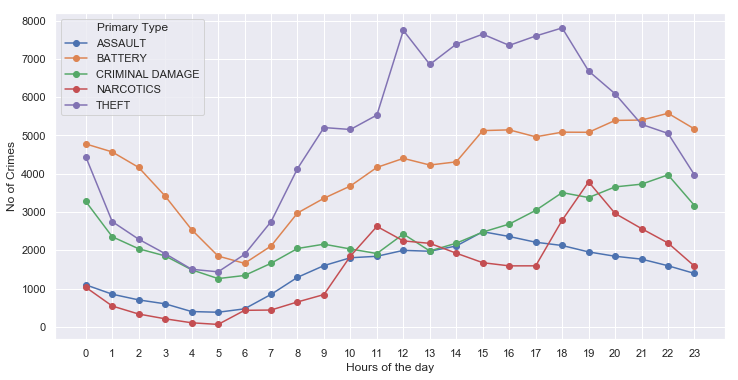

In [30]:
top_crime.groupby([top_crime['Date'].dt.hour,'Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Hours of the day')
plt.xticks(np.arange(24))
plt.show()

# Monthly trend in top 5 crimes

In [31]:
temp= top_crime.pivot_table(values='ID', index='Primary Type', columns='Month', aggfunc=np.size)
temp

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Primary Type,,,,,,,,,,,,
ASSAULT,2447,2322,3076,2904,3462,3405,3304,3351,3221,3087,2669,2502
BATTERY,7263,6408,8408,8142,9602,9419,9258,9210,8579,8371,7368,7119
CRIMINAL DAMAGE,4295,3591,4776,4854,5330,5103,5807,5657,5360,5348,4962,4564
NARCOTICS,3462,3255,3918,3520,3347,3058,3142,2885,2744,2723,2355,1837
THEFT,8871,7220,8918,9101,9970,10339,11197,11594,10883,10826,9745,9795


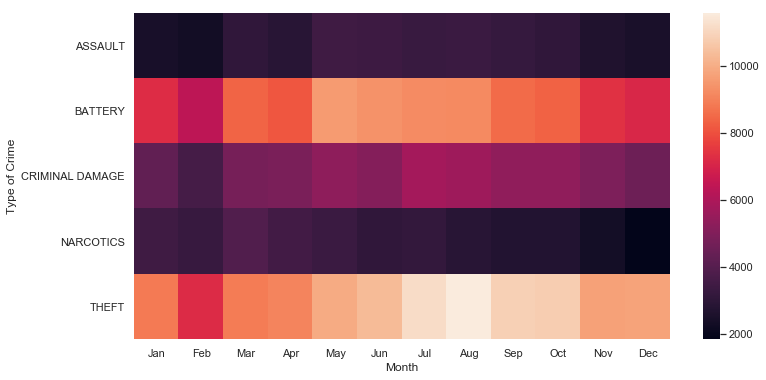

In [32]:
sns.heatmap(temp)
plt.ylabel('Type of Crime')
plt.show()

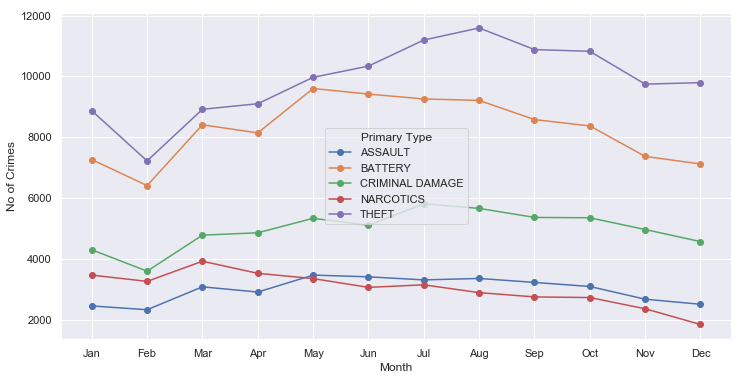

In [33]:
top_crime.groupby(['Month','Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

# Weekly trend in top 5 crime

In [34]:
temp= top_crime.pivot_table(values='ID', index='Primary Type', columns='Weekday', aggfunc=np.size)
temp

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Primary Type,,,,,,,
ASSAULT,5142,5329,5248,5154,5076,4904,4897
BATTERY,13653,12896,12801,13230,13758,15882,16927
CRIMINAL DAMAGE,8157,7705,7910,8131,8845,9717,9182
NARCOTICS,4837,5227,5340,5655,5940,4696,4551
THEFT,16843,16674,16883,17168,18223,17116,15552


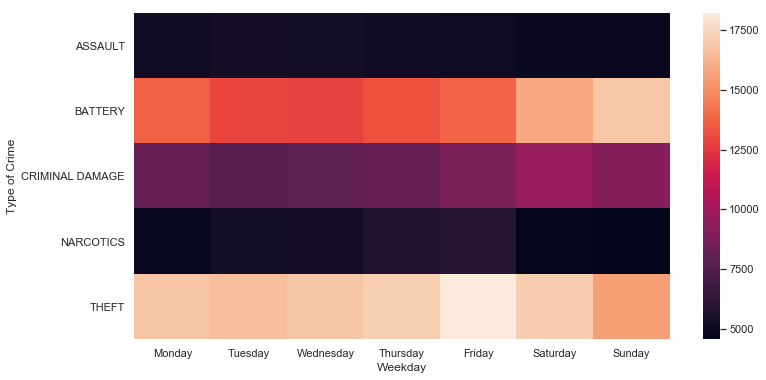

In [35]:
sns.heatmap(temp)
plt.ylabel('Type of Crime')
plt.show()

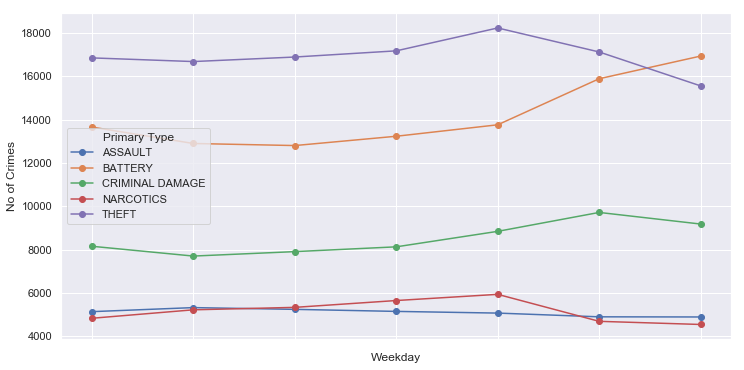

In [36]:
top_crime.groupby(['Weekday','Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.show()

# Location description for top 5 crimes

In [37]:
temp=list(top_crime['Location Description'].value_counts()[:20].index)
top_crime['Location Description']=np.where(top_crime['Location Description'].isin(temp),top_crime['Location Description'],'OTHER')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
top_crime['Location Description'].value_counts()

STREET                            83162
APARTMENT                         46057
RESIDENCE                         45688
OTHER                             45229
SIDEWALK                          36800
PARKING LOT/GARAGE(NON.RESID.)    11829
RESIDENTIAL YARD (FRONT/BACK)      8406
SMALL RETAIL STORE                 8299
RESIDENCE PORCH/HALLWAY            7643
VEHICLE NON-COMMERCIAL             7354
ALLEY                              7246
RESTAURANT                         7173
DEPARTMENT STORE                   6998
SCHOOL, PUBLIC, BUILDING           6546
GROCERY FOOD STORE                 5025
RESIDENCE-GARAGE                   4277
GAS STATION                        3444
PARK PROPERTY                      3240
BAR OR TAVERN                      2888
CONVENIENCE STORE                  1945
Name: Location Description, dtype: int64

In [39]:
temp= top_crime.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size)
temp

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Location Description,,,,,
ALLEY,877,2068,980,2286,1035
APARTMENT,5327,24264,7719,1332,7415
BAR OR TAVERN,110,974,140,21,1643
CONVENIENCE STORE,267,292,175,53,1158
DEPARTMENT STORE,173,165,79,18,6563
GAS STATION,475,644,387,494,1444
GROCERY FOOD STORE,309,369,162,37,4148
OTHER,4686,9576,6143,3171,21653
PARK PROPERTY,267,906,252,489,1326


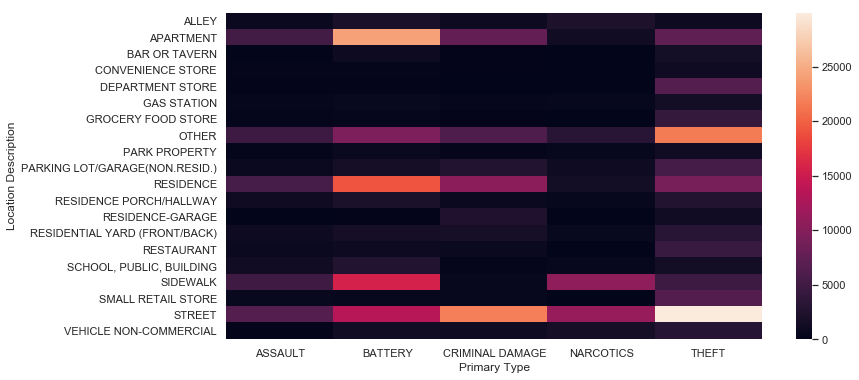

In [40]:
sns.heatmap(temp)
plt.show()